In [ ]:
# Importando librerías
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from keras.models import clone_model

In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Cargando dataset de Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

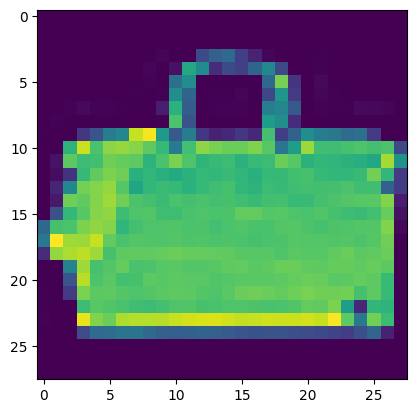

In [12]:
plt.imshow(train_images[99])

In [13]:
# Limpieza de datos. Reescalar los valores de los pixeles para que quede todo entre 0 y 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [14]:
# Reshape de los datos sobre el canal 1 para tenerlo en escala de grises
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Reshape de los labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [15]:
# Creando nuestra red neuronal¶
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [16]:
# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

In [17]:
# Compilando la red neuronal
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']
             )

In [18]:
# Entenando la red
model.fit(train_images,
          train_labels,
          batch_size=64,
          epochs=10
         )

Epoch 1/10


2024-06-17 21:23:50.731926: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 5s 5ms/step - loss: 0.5961 - accuracy: 0.7843
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4034 - accuracy: 0.8558
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3595 - accuracy: 0.8700
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3349 - accuracy: 0.8783
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3228 - accuracy: 0.8847
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3134 - accuracy: 0.8880
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3069 - accuracy: 0.8896
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3027 - accuracy: 0.8910
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2998 - accuracy: 0.8937
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2977 - accuracy: 0.8941
